<a href="https://colab.research.google.com/github/cabbi120101/final_multi/blob/main/Try/%EC%A7%84%EC%A7%9C%EC%B5%9C%EC%A2%85%EC%9E%90%EC%97%B0%EC%96%B4_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import re
import pandas as pd

import numpy as np
import json

from nltk.corpus import stopwords
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer

In [37]:
champ_info = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/동욱코드모음/마지막프로젝트/3주차/시도/champ_addSk.csv")
champ_info.head()

,Unnamed: 0,version,id,key,name,title,blurb,info,image,tags,partype,stats,attack,defense,magic,difficulty,hp,hpperlevel,mp,mpperlevel,movespeed,armor,armorperlevel,spellblock,spellblockperlevel,attackrange,hpregen,hpregenperlevel,mpregen,mpregenperlevel,crit,critperlevel,attackdamage,attackdamageperlevel,attackspeedperlevel,attackspeed,skins,lore,allytips,enemytips,spells,passive,recommended,skillQ,skillW,skillE,skillR
0,0,11.17.1,Aatrox,266,Aatrox,the Darkin Blade,Once honored defenders of Shurima against the ...,"{'attack': 8, 'defense': 4, 'magic': 3, 'diffi...","{'full': 'Aatrox.png', 'sprite': 'champion0.pn...","['Fighter', 'Tank']",Blood Well,"{'hp': 580, 'hpperlevel': 90, 'mp': 0, 'mpperl...",8,4,3,4,580.0,90,0.0,0.0,345,38,3.25,32.0,1.25,175,3.00,1.00,0.000,0.0,0,0,60.0,5.00,2.500,0.651,"[{'id': '266000', 'num': 0, 'name': 'default',...",Once honored defenders of Shurima against the ...,['Use Umbral Dash while casting The Darkin Bla...,"[""Aatrox's attacks are very telegraphed, so us...","[{'id': 'AatroxQ', 'name': 'The Darkin Blade',...","{'name': 'Deathbringer Stance', 'description':...",[],"{'id': 'AatroxQ', 'name': 'The Darkin Blade', ...","{'id': 'AatroxW', 'name': 'Infernal Chains', '...","{'id': 'AatroxE', 'name': 'Umbral Dash', 'desc...","{'id': 'AatroxR', 'name': 'World Ender', 'desc..."
1,1,11.17.1,Ahri,103,Ahri,the Nine-Tailed Fox,Innately connected to the latent power of Rune...,"{'attack': 3, 'defense': 4, 'magic': 8, 'diffi...","{'full': 'Ahri.png', 'sprite': 'champion0.png'...","['Mage', 'Assassin']",Mana,"{'hp': 526, 'hpperlevel': 92, 'mp': 418, 'mppe...",3,4,8,5,526.0,92,418.0,25.0,330,21,3.50,30.0,0.50,550,5.50,0.60,8.000,0.8,0,0,53.0,3.00,2.000,0.668,"[{'id': '103000', 'num': 0, 'name': 'default',...",Innately connected to the latent power of Rune...,"['Use Charm to set up your combos, it will mak...","[""Ahri's survivability is dramatically reduced...","[{'id': 'AhriOrbofDeception', 'name': 'Orb of ...","{'name': 'Essence Theft', 'description': 'When...",[],"{'id': 'AhriOrbofDeception', 'name': 'Orb of D...","{'id': 'AhriFoxFire', 'name': 'Fox-Fire', 'des...","{'id': 'AhriSeduce', 'name': 'Charm', 'descrip...","{'id': 'AhriTumble', 'name': 'Spirit Rush', 'd..."
2,2,11.17.1,Akali,84,Akali,the Rogue Assassin,Abandoning the Kinkou Order and her title of t...,"{'attack': 5, 'defense': 3, 'magic': 8, 'diffi...","{'full': 'Akali.png', 'sprite': 'champion0.png...",['Assassin'],Energy,"{'hp': 500, 'hpperlevel': 105, 'mp': 200, 'mpp...",5,3,8,7,500.0,105,200.0,0.0,345,23,3.50,37.0,1.25,125,8.00,0.50,50.000,0.0,0,0,62.0,3.30,3.200,0.625,"[{'id': '84000', 'num': 0, 'name': 'default', ...",Abandoning the Kinkou Order and her title of t...,['Akali excels at killing fragile champions. L...,['Akali can still be hit by area effect spells...,"[{'id': 'AkaliQ', 'name': 'Five Point Strike',...","{'name': ""Assassin's Mark"", 'description': ""De...",[],"{'id': 'AkaliQ', 'name': 'Five Point Strike', ...","{'id': 'AkaliW', 'name': 'Twilight Shroud', 'd...","{'id': 'AkaliE', 'name': 'Shuriken Flip', 'des...","{'id': 'AkaliR', 'name': 'Perfect Execution', ..."
3,3,11.17.1,Akshan,166,Akshan,the Rogue Sentinel,"Raising an eyebrow in the face of danger, Aksh...","{'attack': 0, 'defense': 0, 'magic': 0, 'diffi...","{'full': 'Akshan.png', 'sprite': 'champion0.pn...","['Marksman', 'Assassin']",Mana,"{'hp': 560, 'hpperlevel': 90, 'mp': 350, 'mppe...",0,0,0,0,560.0,90,350.0,40.0,330,26,3.00,30.0,0.50,500,3.75,0.65,8.175,0.7,0,0,52.0,3.50,4.000,0.638,"[{'id': '166000', 'num': 0, 'name': 'default',...","Raising an eyebrow in the face of danger, Aksh...","[""Raising an eyebrow in the face of danger, Ak...",[],"[{'id': 'AkshanQ', 'name': 'Avengerang', 'desc...","{'name': 'Dirty Fighting', 'description': ""Eve...",[],"{'id': 'AkshanQ', 'name': 'Avengerang', 'descr...","{'id': 'AkshanW', 'name': 'Going Rogue', 'desc...","{'id': 'AkshanE', 'name': 'Heroic Swing', 'des...","{'id': 'AkshanR', 'name': 'Comeuppance', 'desc..."
4,4,11.17.1,Al

In [38]:
from ast import literal_eval

champ_info['skillQ'] = champ_info['skillQ'].apply(literal_eval)
champ_info['skillW'] = champ_info['skillW'].apply(literal_eval)
champ_info['skillE'] = champ_info['skillE'].apply(literal_eval)
champ_info['skillR'] = champ_info['skillR'].apply(literal_eval)

In [39]:
champ_info['skillE'][1]['tooltip']

"Ahri blows a kiss that Charms the first enemy hit for {{ e2 }} second(s) and deals {{ totaldamage }} magic damage. The victim also takes {{ e4 }}% more damage from Ahri's Abilities for {{ e5 }} seconds."

In [40]:
champ_info['passive'][155]

"{'name': 'Garden of Thorns', 'description': 'Seeds spawn around Zyra periodically, becoming faster with level. Zyra can cast Deadly Spines or Grasping Roots near seeds to grow plants, who fight for Zyra.', 'image': {'full': 'ZyraP.png', 'sprite': 'passive5.png', 'group': 'passive', 'x': 240, 'y': 0, 'w': 48, 'h': 48}}"

In [41]:
champ_info['passive'][0].replace('\'','').lower().split()

['{name:',
 'deathbringer',
 'stance,',
 'description:',
 '"periodically,',
 'aatroxs',
 'next',
 'basic',
 'attack',
 'deals',
 'bonus',
 'physical',
 'damage',
 'and',
 'heals',
 'him,',
 'based',
 'on',
 'the',
 'targets',
 'max',
 'health.',
 '",',
 'image:',
 '{full:',
 'aatrox_passive.png,',
 'sprite:',
 'passive0.png,',
 'group:',
 'passive,',
 'x:',
 '0,',
 'y:',
 '0,',
 'w:',
 '48,',
 'h:',
 '48}}']

In [42]:
    champ_pas = champ_info['passive'][0].replace('\'','')
    # 영어가 아닌 특수문자를 공백(" ")으로 바꾸기
    champ_pas = re.sub("[^a-zA-Z]"," ", champ_pas)
    
    # 대문자를 소문자로 바꾸고 공백 단위로 텍스트를 나누어 리스트화
    k = champ_pas.lower().split()

In [43]:
len(k)

36

In [44]:
k[2:3]

['stance']

In [45]:
champ_summ = champ_info[['id','key','tags']]

In [46]:
passive = []
for i in range(len(champ_summ)):
    champ_pas = champ_info['passive'][i].replace('\'','')
    # 영어가 아닌 특수문자를 공백(" ")으로 바꾸기
    champ_pas = re.sub("[^a-zA-Z]"," ", champ_pas)
    
    # 대문자를 소문자로 바꾸고 공백 단위로 텍스트를 나누어 리스트화
    k = champ_pas.lower().split()

    for j in range(len(k)):
        if k[j] == 'description':
            start = j +1
        if k[j] == 'image':
            end = j
     
    real_passive = ' '.join(k[start : end])
    passive.append(real_passive)

In [47]:
champ_summ['passive'] = passive

In [48]:
passive[0]

'periodically aatroxs next basic attack deals bonus physical damage and heals him based on the targets max health'

In [49]:
champ_info['skillQ'][36]['tooltip']

'Gragas rolls a cask that explodes after {{ e4 }} seconds, dealing between {{ mindamage }} magic damage and {{ maxdamage }} magic damage and Slowing for between {{ e2 }} and {{ effect2amount*1.5 }}% for {{ e3 }} seconds. The damage and Slow increase with time the cask spent before exploding. Gragas can Recast to detonate the cask early.'

In [50]:
def only_description(column):
    champ_q = []
    for i in range(len(champ_info)):
        champ_q.append(champ_info[column][i]['description'])
    champ_summ[column] = champ_q

In [51]:
def only_tooltips(column):
    champ_q = []
    for i in range(len(champ_info)):
        champ_q.append(champ_info[column][i]['tooltip'])
    name = column + '_' + 'tooltip'
    champ_summ[name] = champ_q

In [52]:
only_tooltips('skillQ')
only_tooltips('skillW')
only_tooltips('skillE')
only_tooltips('skillR')

In [53]:
only_description('skillQ')

In [54]:
only_description('skillW')

In [55]:
only_description('skillE')

In [56]:
only_description('skillR')

In [57]:
champ_summ['champ_all_skill'] = champ_summ['passive'] + champ_summ['skillQ']+champ_summ['skillW']+champ_summ['skillE']+champ_summ['skillR']

In [58]:
champ_summ['skillQ'][0]

'Aatrox slams his greatsword down, dealing physical damage. He can swing three times, each with a different area of effect.'

## 스턴 여과

In [59]:
def skill_set(find):
    skill_setting = ['skillQ','skillW','skillE','skillR','passive']
    skill_find = pd.DataFrame()
    skill_find['id'] = champ_summ['id']
    for i in range(len(skill_setting)):
        column_name = str(find)+skill_setting[i]
        skill_found = find(skill_setting[i])
        champ_summ[column_name] = skill_found
        skill_find[column_name] = skill_found
    sum_name = str(find) + '_' + 'sum'
    skill_find[sum_name] = skill_find[str(find)+'skillQ'] + skill_find[str(find)+'skillW'] + skill_find[str(find)+'skillE'] + skill_find[str(find)+'skillR']+skill_find[str(find)+'passive']
    return skill_find

In [60]:
def find_stun(column):

    stun = []

    for i in range(len(champ_summ)):
        count_stun = 0
        champ_summ[column][i] = champ_summ[column][i].lower()
        if 'stun' in champ_summ[column][i]:
            count_stun = 1
            stun.append(count_stun)

        
        # elif 'stunning' in champ_summ[column][i]:
        #     count_stun = 1
        #     stun.append(count_stun)
   


        # elif 'stunned' in champ_summ[column][i]:
        #     count_stun = 1
        #     stun.append(count_stun)
 

        # elif 'stuns' in champ_summ[column][i]:
        #     count_stun = 1
        #     stun.append(count_stun)
            

        elif 'air' in champ_summ[column][i]:
            count_stun = 1
            stun.append(count_stun)

        # elif 'knocking' in champ_summ[column][i]:
        #     count_stun = 1
        #     stun.append(count_stun)

        # elif 'knocked' in champ_summ[column][i]:
        #     count_stun = 1
        #     stun.append(count_stun)

        elif 'knock' in champ_summ[column][i]:
            count_stun = 1
            stun.append(count_stun)


        elif 'charms' in champ_summ[column][i]:
            count_stun = 1
            stun.append(count_stun)
        # elif 'rooting' in champ_summ[column][i]:
        #     count_stun = 1
        #     stun.append(count_stun)
        elif 'root' in champ_summ[column][i]:
            count_stun = 1
            stun.append(count_stun)
        elif 'sleep' in champ_summ[column][i]:
            count_stun = 1
            stun.append(count_stun)
        elif 'bind' in champ_summ[column][i]:
            count_stun = 1
            stun.append(count_stun)

        elif 'hurl' in champ_summ[column][i]:
            count_stun = 1
            stun.append(count_stun)

        else:
            stun.append(count_stun)  

    # name = column + 'stun'
    # champ_summ[name] = stun
    return stun

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
pd.set_option('display.max_rows',None)
skill_set(find_stun).to_csv("/content/contents/skill_stun.csv")

In [63]:
stun = skill_set(find_stun)

In [64]:
stun

,id,<function find_stun at 0x7fce0bdbdf80>skillQ,<function find_stun at 0x7fce0bdbdf80>skillW,<function find_stun at 0x7fce0bdbdf80>skillE,<function find_stun at 0x7fce0bdbdf80>skillR,<function find_stun at 0x7fce0bdbdf80>passive,<function find_stun at 0x7fce0bdbdf80>_sum
0,Aatrox,0,0,0,0,0,0
1,Ahri,0,0,1,0,0,1
2,Akali,0,0,0,0,0,0
3,Akshan,0,0,1,0,0,1
4,Alistar,1,1,1,0,1,4
5,Amumu,1,0,0,1,0,2
6,Anivia,1,1,0,0,0,2
7,Annie,1,0,0,0,1,2
8,Aphelios,1,0,0,0,0,1
9,Ashe,0,0,0,1,0,1


In [65]:
stun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   id                                             156 non-null    object
 1   <function find_stun at 0x7fce0bdbdf80>skillQ   156 non-null    int64 
 2   <function find_stun at 0x7fce0bdbdf80>skillW   156 non-null    int64 
 3   <function find_stun at 0x7fce0bdbdf80>skillE   156 non-null    int64 
 4   <function find_stun at 0x7fce0bdbdf80>skillR   156 non-null    int64 
 5   <function find_stun at 0x7fce0bdbdf80>passive  156 non-null    int64 
 6   <function find_stun at 0x7fce0bdbdf80>_sum     156 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 8.7+ KB


In [66]:
stun.describe()

,<function find_stun at 0x7fce0bdbdf80>skillQ,<function find_stun at 0x7fce0bdbdf80>skillW,<function find_stun at 0x7fce0bdbdf80>skillE,<function find_stun at 0x7fce0bdbdf80>skillR,<function find_stun at 0x7fce0bdbdf80>passive,<function find_stun at 0x7fce0bdbdf80>_sum
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,0.205128,0.166667,0.294872,0.294872,0.057692,1.019231
std,0.405096,0.373878,0.457454,0.457454,0.233912,0.883331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,1.000000,1.000000,0.000000,1.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [67]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.size'] = 15

import warnings 
warnings.filterwarnings(action='ignore')

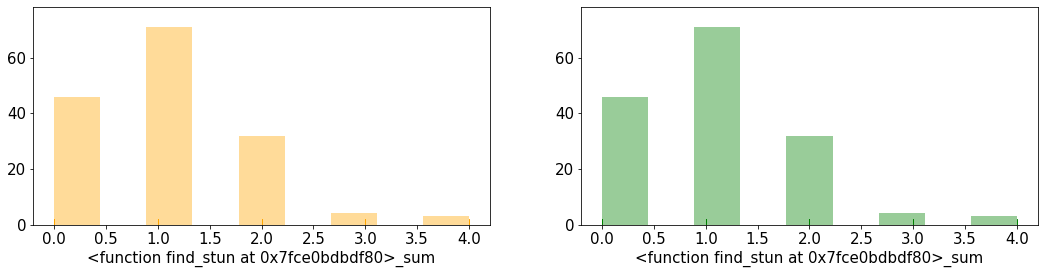

In [130]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 4))
sns.distplot(stun['<function find_stun at 0x7fce0bdbdf80>_sum'], ax = ax[0], color = 'orange', kde = False, rug = True)
sns.distplot(stun['<function find_stun at 0x7fce0bdbdf80>_sum'], ax = ax[1], color = 'green', kde = False, rug = True)
plt.show()

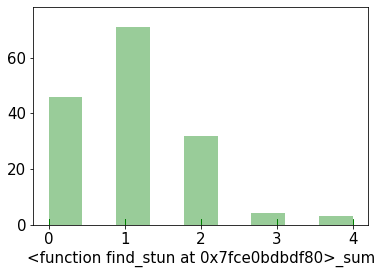

In [133]:
sns.distplot(stun['<function find_stun at 0x7fce0bdbdf80>_sum'], color = 'green', kde = False, rug = True)
plt.show()

In [70]:
stun[stun['<function find_stun at 0x7fce0bdbdf80>_sum']>=3]

,id,<function find_stun at 0x7fce0bdbdf80>skillQ,<function find_stun at 0x7fce0bdbdf80>skillW,<function find_stun at 0x7fce0bdbdf80>skillE,<function find_stun at 0x7fce0bdbdf80>skillR,<function find_stun at 0x7fce0bdbdf80>passive,<function find_stun at 0x7fce0bdbdf80>_sum
4,Alistar,1,1,1,0,1,4
23,Draven,1,0,1,1,0,3
73,Maokai,1,1,0,1,0,3
81,Nautilus,1,0,0,1,1,3
104,Sejuani,1,0,1,1,1,4
112,Sion,1,0,1,1,0,3
155,Zyra,0,1,1,1,1,4


In [71]:
find_stun('skillQ')

[0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0]

In [72]:
find_stun('skillW')
find_stun('skillE')
find_stun('skillR')
find_stun('passive')

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

## 쉴드 여과

In [73]:
def skill_set(find):
    skill_setting = ['skillQ','skillW','skillE','skillR','passive']
    skill_find = pd.DataFrame()
    skill_find['id'] = champ_summ['id']
    for i in range(len(skill_setting)):
        column_name = str(find)+skill_setting[i]
        skill_found = find(skill_setting[i])
        champ_summ[column_name] = skill_found
        skill_find[column_name] = skill_found
    sum_name = str(find) + '_' + 'sum'
    skill_find[sum_name] = skill_find[str(find)+'skillQ'] + skill_find[str(find)+'skillW'] + skill_find[str(find)+'skillE'] + skill_find[str(find)+'skillR']+skill_find[str(find)+'passive']
    return skill_find

In [74]:
def find_shield(column):

    shield = []

    for i in range(len(champ_summ)):
        count_shield = 0
        champ_summ[column][i] = champ_summ[column][i].lower()

        if 'shield' in champ_summ[column][i]:
            count_shield = 1
            shield.append(count_shield)

        
        elif 'shielding' in champ_summ[column][i]:
            count_shield = 1
            shield.append(count_shield)
   


        elif 'shielded' in champ_summ[column][i]:
            count_shield = 1
            shield.append(count_shield)
 

        elif 'shields' in champ_summ[column][i]:
            count_shield = 1
            shield.append(count_shield)

        
        elif 'reducing' in champ_summ[column][i]:
            if 'himself' in champ_summ[column][i]:
                count_shield = 1
                shield.append(count_shield)
            elif 'itself' in champ_summ[column][i]:
                count_shield = 1
                shield.append(count_shield)
            elif 'herself' in champ_summ[column][i]:
                count_shield = 1
                shield.append(count_shield)       
            else:
                count_shield = 0
                shield.append(count_shield)                       
   


        elif 'resist' in champ_summ[column][i]:
            count_shield = 1
            shield.append(count_shield)
        elif 'protective' in champ_summ[column][i]:
            count_shield = 1
            shield.append(count_shield)

        elif 'protecting' in champ_summ[column][i]:
            count_shield = 1
            shield.append(count_shield) 

        elif 'barrier' in champ_summ[column][i]:
            count_shield = 1
            shield.append(count_shield) 
 

        elif 'defensive' in champ_summ[column][i]:
            count_shield = 1
            shield.append(count_shield)

        # elif 'armor' in champ_summ[column][i]:
        #     count_shield = 1
        #     shield.append(count_shield)
        

        else:
            shield.append(count_shield)  

    # name = column + 'shield'
    # champ_summ[name] = shield
    return shield

In [75]:
skill_set(find_shield).to_csv("/content/contents/skill_shield.csv")

In [76]:
shield = skill_set(find_shield)

In [81]:
shield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   id                                               156 non-null    object
 1   <function find_shield at 0x7fce05fc7c20>skillQ   156 non-null    int64 
 2   <function find_shield at 0x7fce05fc7c20>skillW   156 non-null    int64 
 3   <function find_shield at 0x7fce05fc7c20>skillE   156 non-null    int64 
 4   <function find_shield at 0x7fce05fc7c20>skillR   156 non-null    int64 
 5   <function find_shield at 0x7fce05fc7c20>passive  156 non-null    int64 
 6   <function find_shield at 0x7fce05fc7c20>_sum     156 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 8.7+ KB


In [82]:
shield.describe()

,<function find_shield at 0x7fce05fc7c20>skillQ,<function find_shield at 0x7fce05fc7c20>skillW,<function find_shield at 0x7fce05fc7c20>skillE,<function find_shield at 0x7fce05fc7c20>skillR,<function find_shield at 0x7fce05fc7c20>passive,<function find_shield at 0x7fce05fc7c20>_sum
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,0.038462,0.185897,0.108974,0.083333,0.096154,0.512821
std,0.192927,0.390277,0.312611,0.277276,0.295752,0.686150
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


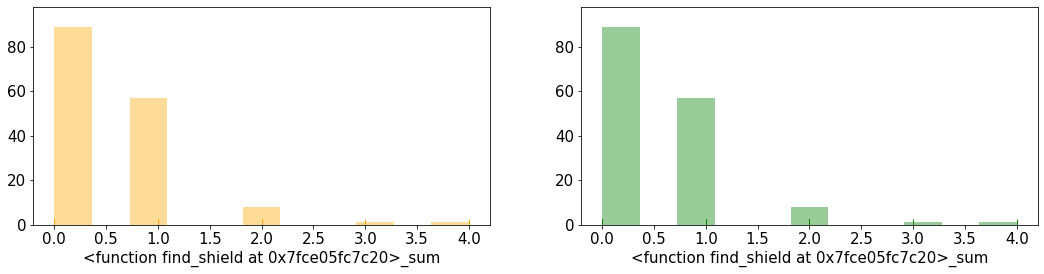

In [78]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 4))
sns.distplot(shield['<function find_shield at 0x7fce05fc7c20>_sum'], ax = ax[0], color = 'orange', kde = False, rug = True)
sns.distplot(shield['<function find_shield at 0x7fce05fc7c20>_sum'], ax = ax[1], color = 'green', kde = False, rug = True)
plt.show()

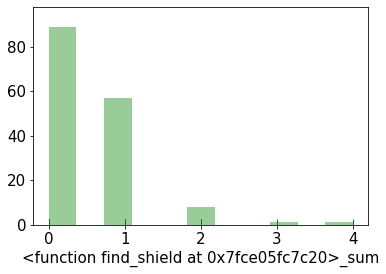

In [134]:
sns.distplot(shield['<function find_shield at 0x7fce05fc7c20>_sum'],color = 'green', kde = False, rug = True)
plt.show()

In [80]:
shield[shield['<function find_shield at 0x7fce05fc7c20>_sum']>1]

,id,<function find_shield at 0x7fce05fc7c20>skillQ,<function find_shield at 0x7fce05fc7c20>skillW,<function find_shield at 0x7fce05fc7c20>skillE,<function find_shield at 0x7fce05fc7c20>skillR,<function find_shield at 0x7fce05fc7c20>passive,<function find_shield at 0x7fce05fc7c20>_sum
13,Blitzcrank,0,0,0,1,1,2
15,Braum,1,1,1,0,0,3
32,Galio,0,1,0,1,0,2
65,Leona,1,1,0,0,0,2
90,Poppy,0,1,0,0,1,2
94,Rakan,0,0,1,0,1,2
97,Rell,1,1,1,0,1,4
109,Shen,0,0,0,1,1,2
120,TahmKench,0,0,1,1,0,2
153,Zilean,0,1,0,1,0,2


## 슬로우

In [83]:
def find_slow(column):

    slow = []

    for i in range(len(champ_summ)):
        count_slow = 0
        champ_summ[column][i] = champ_summ[column][i].lower()

        if 'slow' in champ_summ[column][i]:
            count_slow = 1
            slow.append(count_slow)




        # elif 'slowed' in champ_summ[column][i]:
        #     count_slow = 1
        #     slow.append(count_slow)

        # elif 'slows' in champ_summ[column][i]:
        #     count_slow = 1
        #     slow.append(count_slow)

        # elif 'slowing' in champ_summ[column][i]:
        #     count_slow = 1
        #     slow.append(count_slow)

        elif 'freezes' in champ_summ[column][i]:
            count_slow = 1
            slow.append(count_slow)

        # elif 'slows' in champ_summ[column][i]:
        #     count_slow = 1
        #     slow.append(count_slow)
        else:
            slow.append(count_slow)  

    # name = column + 'shield'
    # champ_summ[name] = shield
    return slow

In [84]:
skill_set(find_slow).to_csv("/content/contents/skill_slow.csv")

In [85]:
slow = skill_set(find_slow)

In [88]:
slow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   id                                             156 non-null    object
 1   <function find_slow at 0x7fcdfd49f710>skillQ   156 non-null    int64 
 2   <function find_slow at 0x7fcdfd49f710>skillW   156 non-null    int64 
 3   <function find_slow at 0x7fcdfd49f710>skillE   156 non-null    int64 
 4   <function find_slow at 0x7fcdfd49f710>skillR   156 non-null    int64 
 5   <function find_slow at 0x7fcdfd49f710>passive  156 non-null    int64 
 6   <function find_slow at 0x7fcdfd49f710>_sum     156 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 8.7+ KB


In [89]:
slow.describe()

,<function find_slow at 0x7fcdfd49f710>skillQ,<function find_slow at 0x7fcdfd49f710>skillW,<function find_slow at 0x7fcdfd49f710>skillE,<function find_slow at 0x7fcdfd49f710>skillR,<function find_slow at 0x7fcdfd49f710>passive,<function find_slow at 0x7fcdfd49f710>_sum
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,0.185897,0.185897,0.211538,0.198718,0.038462,0.820513
std,0.390277,0.390277,0.409715,0.400320,0.192927,0.807123
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


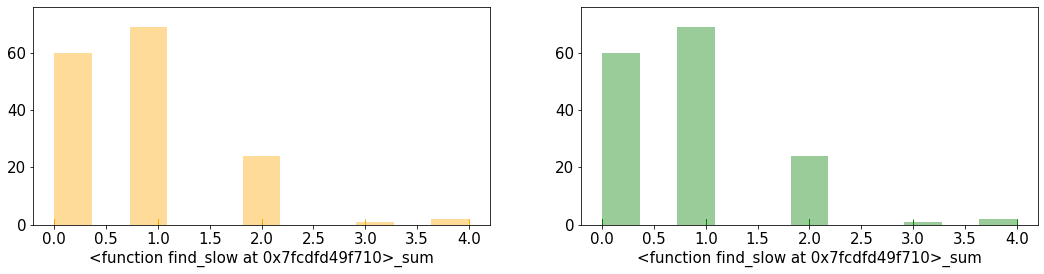

In [86]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 4))
sns.distplot(slow['<function find_slow at 0x7fcdfd49f710>_sum'], ax = ax[0], color = 'orange', kde = False, rug = True)
sns.distplot(slow['<function find_slow at 0x7fcdfd49f710>_sum'], ax = ax[1], color = 'green', kde = False, rug = True)
plt.show()

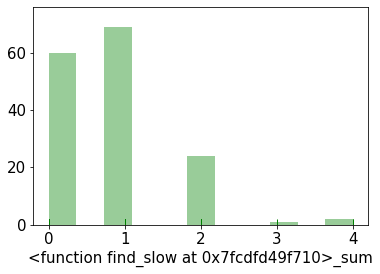

In [135]:
sns.distplot(slow['<function find_slow at 0x7fcdfd49f710>_sum'], color = 'green', kde = False, rug = True)
plt.show()

In [87]:
slow[slow['<function find_slow at 0x7fcdfd49f710>_sum']>=2]

,id,<function find_slow at 0x7fcdfd49f710>skillQ,<function find_slow at 0x7fcdfd49f710>skillW,<function find_slow at 0x7fcdfd49f710>skillE,<function find_slow at 0x7fcdfd49f710>skillR,<function find_slow at 0x7fcdfd49f710>passive,<function find_slow at 0x7fcdfd49f710>_sum
9,Ashe,0,0,0,1,1,2
12,Bard,1,0,0,0,1,2
15,Braum,1,0,0,1,0,2
18,Cassiopeia,0,1,0,1,0,2
19,Chogath,1,0,1,0,0,2
23,Draven,0,0,1,1,0,2
25,Ekko,1,1,0,0,0,2
30,Fiora,0,1,1,0,0,2
33,Gangplank,0,0,1,1,0,2
35,Gnar,1,0,0,1,0,2


## 생존기? 대쉬 기?

In [90]:
def find_speed(column):

    speed = []

    for i in range(len(champ_summ)):
        count_speed = 0
        champ_summ[column][i] = champ_summ[column][i].lower()

        if 'dashes' in champ_summ[column][i]:
            count_speed = 1
            speed.append(count_speed)




        elif 'dash' in champ_summ[column][i]:
            count_speed = 1
            speed.append(count_speed)

        elif 'faster' in champ_summ[column][i]:
            count_speed = 1
            speed.append(count_speed)

        elif 'fast' in champ_summ[column][i]:
            count_slow = 1
            speed.append(count_speed)
        elif 'jump' in champ_summ[column][i]:
            count_slow = 1
            speed.append(count_speed)


        elif 'portal' in champ_summ[column][i]:
            count_slow = 1
            speed.append(count_speed)
        elif 'blinks' in champ_summ[column][i]:
            count_slow = 1
            speed.append(count_speed)
        # elif 'blinks' in champ_summ[column][i]:
        #     count_slow = 1
        #     speed.append(count_speed)

        else:
            speed.append(count_speed)  

    # name = column + 'shield'
    # champ_summ[name] = shield
    return speed

In [91]:
skill_set(find_speed).to_csv("/content/contents/skill_speed.csv")

In [92]:
speed = skill_set(find_speed)

In [93]:
speed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   id                                              156 non-null    object
 1   <function find_speed at 0x7fcdfd445710>skillQ   156 non-null    int64 
 2   <function find_speed at 0x7fcdfd445710>skillW   156 non-null    int64 
 3   <function find_speed at 0x7fcdfd445710>skillE   156 non-null    int64 
 4   <function find_speed at 0x7fcdfd445710>skillR   156 non-null    int64 
 5   <function find_speed at 0x7fcdfd445710>passive  156 non-null    int64 
 6   <function find_speed at 0x7fcdfd445710>_sum     156 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 8.7+ KB


In [94]:
speed.describe()

,<function find_speed at 0x7fcdfd445710>skillQ,<function find_speed at 0x7fcdfd445710>skillW,<function find_speed at 0x7fcdfd445710>skillE,<function find_speed at 0x7fcdfd445710>skillR,<function find_speed at 0x7fcdfd445710>passive,<function find_speed at 0x7fcdfd445710>_sum
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,0.038462,0.076923,0.134615,0.044872,0.025641,0.320513
std,0.192927,0.267328,0.342412,0.207689,0.158571,0.544618
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


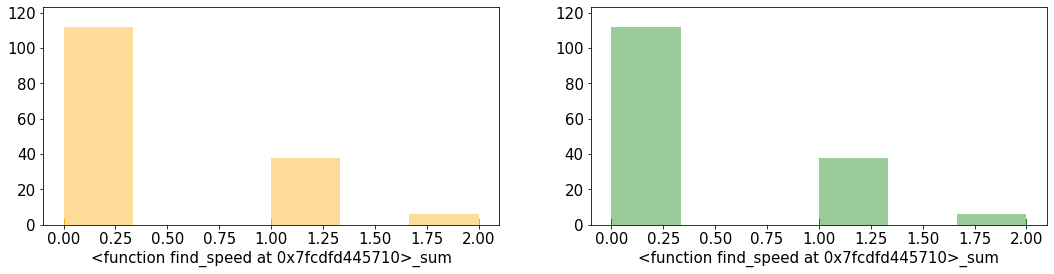

In [95]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 4))
sns.distplot(speed['<function find_speed at 0x7fcdfd445710>_sum'], ax = ax[0], color = 'orange', kde = False, rug = True)
sns.distplot(speed['<function find_speed at 0x7fcdfd445710>_sum'], ax = ax[1], color = 'green', kde = False, rug = True)
plt.show()

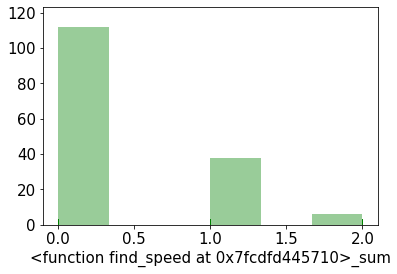

In [136]:
sns.distplot(speed['<function find_speed at 0x7fcdfd445710>_sum'], color = 'green', kde = False, rug = True)
plt.show()

In [97]:
speed[speed['<function find_speed at 0x7fcdfd445710>_sum']==2]

,id,<function find_speed at 0x7fcdfd445710>skillQ,<function find_speed at 0x7fcdfd445710>skillW,<function find_speed at 0x7fcdfd445710>skillE,<function find_speed at 0x7fcdfd445710>skillR,<function find_speed at 0x7fcdfd445710>passive,<function find_speed at 0x7fcdfd445710>_sum
2,Akali,0,0,1,1,0,2
76,MonkeyKing,0,1,1,0,0,2
90,Poppy,0,1,1,0,0,2
92,Qiyana,0,1,1,0,0,2
103,Samira,0,0,1,0,1,2
151,Zed,0,1,0,1,0,2


In [ ]:
champ_summ.info()

## 물리뎀

In [99]:
def skill_tool(find):
    skill_setting = ['skillQ_tooltip','skillW_tooltip','skillE_tooltip','skillR_tooltip']
    skill_find = pd.DataFrame()
    skill_find['id'] = champ_summ['id']
    for i in range(len(skill_setting)):
        column_name = str(find)+skill_setting[i]
        skill_found = find(skill_setting[i])
        champ_summ[column_name] = skill_found
        skill_find[column_name] = skill_found
    sum_name = str(find) + '_'+ 'sum'
    skill_find[sum_name] = skill_find[str(find)+'skillQ_tooltip'] + skill_find[str(find)+'skillW_tooltip'] + skill_find[str(find)+'skillE_tooltip'] + skill_find[str(find)+'skillR_tooltip']
    return skill_find

In [100]:
def find_physical(column):

    physical = []

    for i in range(len(champ_summ)):
        count_physical = 0
        champ_summ[column][i] = champ_summ[column][i].lower()

        if 'basic' in champ_summ[column][i]:
            count_physical = 1
            physical.append(count_physical)




        elif 'physical' in champ_summ[column][i]:
            count_physical = 1
            physical.append(count_physical)




        else:
            physical.append(count_physical)  

    # name = column + 'shield'
    # champ_summ[name] = shield
    return physical

In [101]:
skill_tool(find_physical).to_csv("/content/contents/skill_physical.csv")

In [102]:
physical = skill_tool(find_physical)

In [103]:
physical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   id                                                        156 non-null    object
 1   <function find_physical at 0x7fcdfd63c5f0>skillQ_tooltip  156 non-null    int64 
 2   <function find_physical at 0x7fcdfd63c5f0>skillW_tooltip  156 non-null    int64 
 3   <function find_physical at 0x7fcdfd63c5f0>skillE_tooltip  156 non-null    int64 
 4   <function find_physical at 0x7fcdfd63c5f0>skillR_tooltip  156 non-null    int64 
 5   <function find_physical at 0x7fcdfd63c5f0>_sum            156 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 7.4+ KB


In [104]:
physical.describe()

,<function find_physical at 0x7fcdfd63c5f0>skillQ_tooltip,<function find_physical at 0x7fcdfd63c5f0>skillW_tooltip,<function find_physical at 0x7fcdfd63c5f0>skillE_tooltip,<function find_physical at 0x7fcdfd63c5f0>skillR_tooltip,<function find_physical at 0x7fcdfd63c5f0>_sum
count,156.000000,156.000000,156.00000,156.000000,156.000000
mean,0.435897,0.198718,0.24359,0.269231,1.147436
std,0.497471,0.400320,0.43063,0.444989,1.258799
min,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,1.000000
75%,1.000000,0.000000,0.00000,1.000000,2.000000
max,1.000000,1.000000,1.00000,1.000000,4.000000


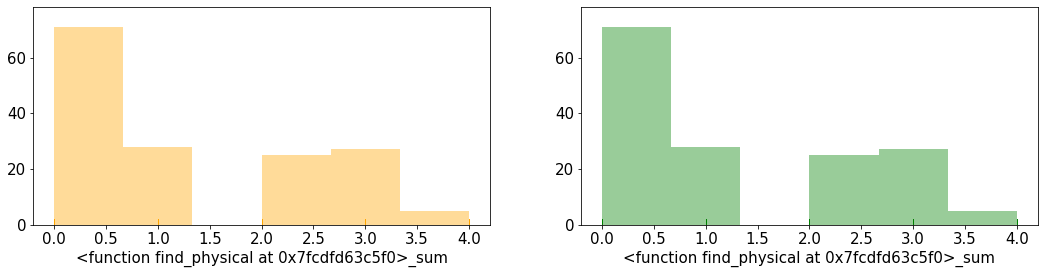

In [107]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 4))
sns.distplot(physical['<function find_physical at 0x7fcdfd63c5f0>_sum'], ax = ax[0], color = 'orange', kde = False, rug = True)
sns.distplot(physical['<function find_physical at 0x7fcdfd63c5f0>_sum'], ax = ax[1], color = 'green', kde = False, rug = True)
plt.show()

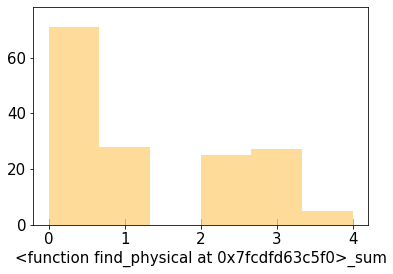

In [138]:
sns.distplot(physical['<function find_physical at 0x7fcdfd63c5f0>_sum'], color = 'orange', kde = False, rug = True)
plt.show()

In [108]:
physical[physical['<function find_physical at 0x7fcdfd63c5f0>_sum']>=3]

,id,<function find_physical at 0x7fcdfd63c5f0>skillQ_tooltip,<function find_physical at 0x7fcdfd63c5f0>skillW_tooltip,<function find_physical at 0x7fcdfd63c5f0>skillE_tooltip,<function find_physical at 0x7fcdfd63c5f0>skillR_tooltip,<function find_physical at 0x7fcdfd63c5f0>_sum
3,Akshan,1,0,1,1,3
17,Camille,1,1,1,0,3
23,Draven,1,0,1,1,3
35,Gnar,1,0,1,1,3
41,Illaoi,1,1,0,1,3
48,Jhin,1,1,0,1,3
49,Jinx,1,1,0,1,3
57,Kayn,1,1,0,1,3
59,Khazix,1,1,1,0,3
61,Kled,1,1,1,1,4


In [109]:
physical[physical['<function find_physical at 0x7fcdfd63c5f0>_sum']==2]

,id,<function find_physical at 0x7fcdfd63c5f0>skillQ_tooltip,<function find_physical at 0x7fcdfd63c5f0>skillW_tooltip,<function find_physical at 0x7fcdfd63c5f0>skillE_tooltip,<function find_physical at 0x7fcdfd63c5f0>skillR_tooltip,<function find_physical at 0x7fcdfd63c5f0>_sum
0,Aatrox,1,1,0,0,2
16,Caitlyn,1,0,0,1,2
21,Darius,1,1,0,0,2
33,Gangplank,1,0,1,0,2
34,Garen,1,0,1,0,2
37,Graves,1,0,0,1,2
39,Hecarim,1,0,1,0,2
42,Irelia,1,1,0,0,2
45,JarvanIV,1,0,0,1,2
46,Jax,1,0,1,0,2


## 마법!

In [110]:
def find_magic(column):

    magic = []

    for i in range(len(champ_summ)):
        count_magic = 0
        champ_summ[column][i] = champ_summ[column][i].lower()

        if 'magic' in champ_summ[column][i]:
            count_magic = 1
            magic.append(count_magic)




        elif 'magical' in champ_summ[column][i]:
            count_magic = 1
            magic.append(count_magic)




        else:
            magic.append(count_magic)  

    # name = column + 'shield'
    # champ_summ[name] = shield
    return magic

In [111]:
skill_tool(find_magic).to_csv("/content/contents/skill_magic.csv")

In [112]:
magic = skill_tool(find_magic)

In [113]:
magic

,id,<function find_magic at 0x7fce05f85d40>skillQ_tooltip,<function find_magic at 0x7fce05f85d40>skillW_tooltip,<function find_magic at 0x7fce05f85d40>skillE_tooltip,<function find_magic at 0x7fce05f85d40>skillR_tooltip,<function find_magic at 0x7fce05f85d40>_sum
0,Aatrox,0,0,0,0,0
1,Ahri,1,1,1,1,4
2,Akali,1,0,1,1,3
3,Akshan,0,0,0,0,0
4,Alistar,1,1,1,0,3
5,Amumu,1,1,1,1,4
6,Anivia,1,0,1,1,3
7,Annie,1,1,1,1,4
8,Aphelios,0,0,0,0,0
9,Ashe,0,0,0,1,1


In [114]:
magic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   id                                                     156 non-null    object
 1   <function find_magic at 0x7fce05f85d40>skillQ_tooltip  156 non-null    int64 
 2   <function find_magic at 0x7fce05f85d40>skillW_tooltip  156 non-null    int64 
 3   <function find_magic at 0x7fce05f85d40>skillE_tooltip  156 non-null    int64 
 4   <function find_magic at 0x7fce05f85d40>skillR_tooltip  156 non-null    int64 
 5   <function find_magic at 0x7fce05f85d40>_sum            156 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 7.4+ KB


In [115]:
magic.describe()

,<function find_magic at 0x7fce05f85d40>skillQ_tooltip,<function find_magic at 0x7fce05f85d40>skillW_tooltip,<function find_magic at 0x7fce05f85d40>skillE_tooltip,<function find_magic at 0x7fce05f85d40>skillR_tooltip,<function find_magic at 0x7fce05f85d40>_sum
count,156.000000,156.000000,156.000000,156.000000,156.000000
mean,0.532051,0.532051,0.576923,0.576923,2.217949
std,0.500579,0.500579,0.495639,0.495639,1.433673
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,2.000000
75%,1.000000,1.000000,1.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,4.000000


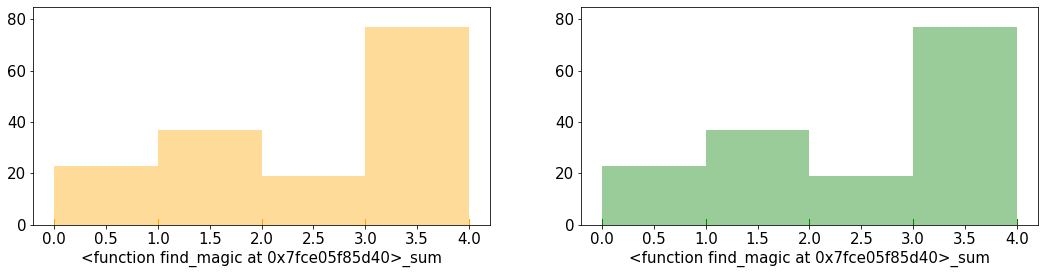

In [116]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 4))
sns.distplot(magic['<function find_magic at 0x7fce05f85d40>_sum'], ax = ax[0], color = 'orange', kde = False, rug = True)
sns.distplot(magic['<function find_magic at 0x7fce05f85d40>_sum'], ax = ax[1], color = 'green', kde = False, rug = True)
plt.show()

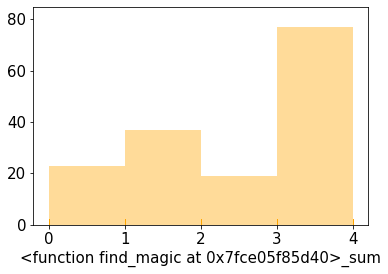

In [139]:
sns.distplot(magic['<function find_magic at 0x7fce05f85d40>_sum'],  color = 'orange', kde = False, rug = True)
plt.show()

In [118]:
magic[magic['<function find_magic at 0x7fce05f85d40>_sum']==2]

,id,<function find_magic at 0x7fce05f85d40>skillQ_tooltip,<function find_magic at 0x7fce05f85d40>skillW_tooltip,<function find_magic at 0x7fce05f85d40>skillE_tooltip,<function find_magic at 0x7fce05f85d40>skillR_tooltip,<function find_magic at 0x7fce05f85d40>_sum
10,AurelionSol,1,0,0,1,2
12,Bard,1,0,0,1,2
13,Blitzcrank,1,0,0,1,2
24,DrMundo,1,1,0,0,2
26,Elise,1,1,0,0,2
39,Hecarim,0,1,0,1,2
46,Jax,0,1,0,1,2
69,Lulu,1,0,1,0,2
77,Mordekaiser,1,0,1,0,2
80,Nasus,0,0,1,1,2


## 합치기

In [ ]:
# 스킬 종류 - 상대방 제어기, 딜 , 방어력 올리기, 버프 스킬- 힐, 아군 도움 주기

In [ ]:
# all_data = [stun, shield, slow, speed, physical, magic]
# for i in all_data:
#     pd.marge()

In [119]:
pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(stun, shield),slow),speed),physical),magic).to_csv("/content/contents/champ_skill_all.csv")

In [140]:
all_info = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(stun, shield),slow),speed),physical),magic)

In [141]:
all_info

,id,<function find_stun at 0x7fce0bdbdf80>skillQ,<function find_stun at 0x7fce0bdbdf80>skillW,<function find_stun at 0x7fce0bdbdf80>skillE,<function find_stun at 0x7fce0bdbdf80>skillR,<function find_stun at 0x7fce0bdbdf80>passive,<function find_stun at 0x7fce0bdbdf80>_sum,<function find_shield at 0x7fce05fc7c20>skillQ,<function find_shield at 0x7fce05fc7c20>skillW,<function find_shield at 0x7fce05fc7c20>skillE,<function find_shield at 0x7fce05fc7c20>skillR,<function find_shield at 0x7fce05fc7c20>passive,<function find_shield at 0x7fce05fc7c20>_sum,<function find_slow at 0x7fcdfd49f710>skillQ,<function find_slow at 0x7fcdfd49f710>skillW,<function find_slow at 0x7fcdfd49f710>skillE,<function find_slow at 0x7fcdfd49f710>skillR,<function find_slow at 0x7fcdfd49f710>passive,<function find_slow at 0x7fcdfd49f710>_sum,<function find_speed at 0x7fcdfd445710>skillQ,<function find_speed at 0x7fcdfd445710>skillW,<function find_speed at 0x7fcdfd445710>skillE,<function find_speed at 0x7fcdfd445710>skillR,<function find_speed at 0x7fcdfd445710>passive,<function find_speed at 0x7fcdfd445710>_sum,<function find_physical at 0x7fcdfd63c5f0>skillQ_tooltip,<function find_physical at 0x7fcdfd63c5f0>skillW_tooltip,<function find_physical at 0x7fcdfd63c5f0>skillE_tooltip,<function find_physical at 0x7fcdfd63c5f0>skillR_tooltip,<function find_physical at 0x7fcdfd63c5f0>_sum,<function find_magic at 0x7fce05f85d40>skillQ_tooltip,<function find_magic at 0x7fce05f85d40>skillW_tooltip,<function find_magic at 0x7fce05f85d40>skillE_tooltip,<function find_magic at 0x7fce05f85d40>skillR_tooltip,<function find_magic at 0x7fce05f85d40>_sum
0,Aatrox,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,2,0,0,0,0,0
1,Ahri,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,1,4
2,Akali,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,2,0,0,0,0,0,1,0,1,1,3
3,Akshan,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,3,0,0,0,0,0
4,Alistar,1,1,1,0,1,4,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,3
5,Amumu,1,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,4
6,Anivia,1,1,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,3
7,Annie,1,0,0,0,1,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,4
8,Aphelios,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
9,Ashe,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,2,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1


In [145]:
ad_champ = []
ap_champ = []
hybrid_champ = []
which_champ = []
for i in range(len(all_info)):
    which = 0
    if all_info['<function find_physical at 0x7fcdfd63c5f0>_sum'][i] > all_info['<function find_magic at 0x7fce05f85d40>_sum'][i]:
        ad_champ.append(all_info['id'][i])
        which = 1
        which_champ.append(which)
    elif all_info['<function find_physical at 0x7fcdfd63c5f0>_sum'][i] < all_info['<function find_magic at 0x7fce05f85d40>_sum'][i]:
        ap_champ.append(all_info['id'][i])
        which = 2
        which_champ.append(which)
    else:

        which_champ.append(which)
        hybrid_champ.append(all_info['id'][i])

In [170]:
all_info['which_champ'] = which_champ

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
all_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 155
Data columns (total 35 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   id                                                        156 non-null    object
 1   <function find_stun at 0x7fce0bdbdf80>skillQ              156 non-null    int64 
 2   <function find_stun at 0x7fce0bdbdf80>skillW              156 non-null    int64 
 3   <function find_stun at 0x7fce0bdbdf80>skillE              156 non-null    int64 
 4   <function find_stun at 0x7fce0bdbdf80>skillR              156 non-null    int64 
 5   <function find_stun at 0x7fce0bdbdf80>passive             156 non-null    int64 
 6   <function find_stun at 0x7fce0bdbdf80>_sum                156 non-null    int64 
 7   <function find_shield at 0x7fce05fc7c20>skillQ            156 non-null    int64 
 8   <function find_shield at 0x7fc

In [171]:
all_info['which_champ'].count()

156

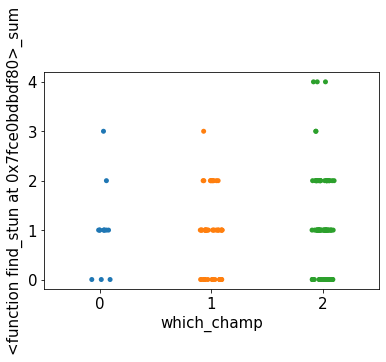

In [180]:
sns.stripplot(x='which_champ', y='<function find_stun at 0x7fce0bdbdf80>_sum', data=all_info)

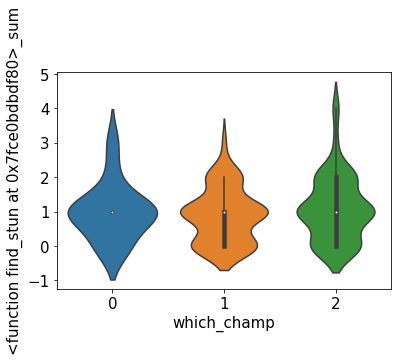

In [181]:
sns.violinplot(x='which_champ', y='<function find_stun at 0x7fce0bdbdf80>_sum', data=all_info)

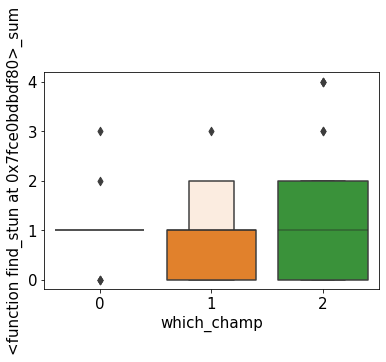

In [182]:
sns.boxenplot(x='which_champ', y='<function find_stun at 0x7fce0bdbdf80>_sum', data=all_info)

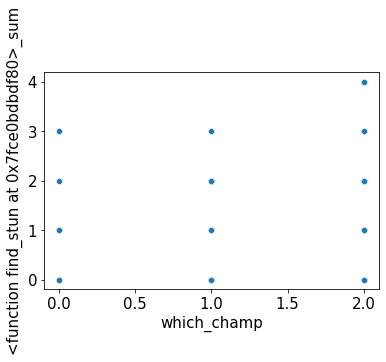

In [191]:

sns.scatterplot(x='id', y='<function find_stun at 0x7fce0bdbdf80>_sum', palette=['green','purple','blue'],hue='which_champ', data=all_info)

In [120]:
from sklearn.feature_extraction.text import CountVectorizer

In [121]:
# 특화된 컨테이너 모듈에서 수 세기를 돕는 메소드를 불러옵니다.
from collections import Counter


In [122]:
len(Counter(['a','a','b']))

2

In [ ]:
def count_word_to_stop(column):
    stops = stopwords.words("english")
    champ_all_words = []
    for i in range(len(champ_summ['id'])):
        # 영어가 아닌 특수문자를 공백(" ")으로 바꾸기
        
        champ_all_discr = champ_summ[column][i]
        champ_all_discr = re.sub("[^a-zA-Z]"," ", champ_all_discr)
        champ_all_discr = champ_all_discr.lower().split()
        champ_all_discr = [w for w in champ_all_discr if w not in stops]

        for i in range(len(champ_all_discr)):
            champ_all_words.append(champ_all_discr[i])

    all_words_count = Counter(champ_all_words)
    to_small = []
    make_it_stop = []
    small_count = []
    for word in all_words_count:

        if all_words_count[word] < 10:
            to_small.append(word)
        else:
            make_it_stop.append(word)
    for small in to_small:
        small_counts = all_words_count[small]
        small_count.append(small_counts)
    small_to_stop = pd.DataFrame()
    small_to_stop['to_stop'] = to_small
    small_to_stop['count'] = small_count
    return small_to_stop

In [ ]:
def most_count_word(column):
    stops = stopwords.words("english")
    champ_all_words = []
    for i in range(len(champ_summ['id'])):
        # 영어가 아닌 특수문자를 공백(" ")으로 바꾸기
        
        champ_all_discr = champ_summ[column][i]
        champ_all_discr = re.sub("[^a-zA-Z]"," ", champ_all_discr)
        champ_all_discr = champ_all_discr.lower().split()
        champ_all_discr = [w for w in champ_all_discr if w not in stops]

        for i in range(len(champ_all_discr)):
            champ_all_words.append(champ_all_discr[i])

    all_words_count = Counter(champ_all_words).most_common()
    return all_words_count

In [ ]:
most_count_word('champ_all_skill')

In [ ]:
count_word_to_stop('champ_all_skill')